In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/QM2/ward-atlas-data-simpleversion.csv',encoding= 'unicode_escape')

In [ ]:
for col in df.columns:
    print (col)
    

'House Prices; Median House Price; 2011' will be the output of linear regression


In [5]:
spike_cols = [col for col in df.columns if '2011' in col]
len(spike_cols)

171

In [6]:
House_data_2011 = pd.DataFrame(df[spike_cols]) 

In [7]:
for col in House_data_2011.columns:
    print (col)

Population and Age; Population Estimates and Projections; 2011
Population and Age; Aged 0-15; 2011
Population and Age; Aged 16-64; 2011
Population and Age; Aged 65+; 2011
Population and Age; All ages; 2011
Population and Age; Mean age; 2011
Population and Age; Median age; 2011
Area and Density; Population density (persons per sq km); 2011 (Census)
Diversity; Ethnic Group 5 groups - 2011 Census; White
Diversity; Ethnic Group 5 groups - 2011 Census; Mixed
Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British
Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British
Diversity; Ethnic Group 5 groups - 2011 Census; Other
Diversity; Ethnic Group 18 groups - 2011 Census; White British
Diversity; Ethnic Group 18 groups - 2011 Census; White Irish
Diversity; Ethnic Group 18 groups - 2011 Census; White Gypsy or Irish Traveller
Diversity; Ethnic Group 18 groups - 2011 Census; Other White
Diversity; Ethnic Group 18 groups - 2011 Census; Mixed White and Black Caribbean


In [8]:
usable_variables = ['House Prices; Median House Price; 2011','Population and Age; Population Estimates and Projections; 2011',
                                            'Area and Density; Population density (persons per sq km); 2011 (Census)',
                                            'Births and deaths; Births; 2011',
                                            'Births and deaths; General Fertility Rate (GFR); 2011',
                                            'Births and deaths; Deaths; 2011',
                                            'Births and deaths; Standardised Mortality Ratio (SMR); 2011',
                                            'Children in Poverty; % of children aged under 16 in poverty; 2011',
                                            'Childhood Obesity Prevalence; Reception (age 4-5 years); 2009/10 to 2011/12: % obese',
                                            'Childhood Obesity Prevalence; Reception (age 4-5 years); 2011/12 to 2013/14: % obese',
                                            'Childhood Obesity Prevalence; Year 6 (age 10-11); 2009/10 to 2011/12: % obese',
                                            'Childhood Obesity Prevalence; Year 6 (age 10-11); 2011/12 to 2013/14: % obese',
                                            'Employment; Economic Activity (Percentages) - 2011 Census; Employment rate (16-64)',
                                            'Employment; Economic Activity (Percentages) - 2011 Census; Economically active %',
                                            'Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %',
                                            'Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % In employment',
                                            'Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % Unemployed',
                                            'Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed',
                                            'Employment; Lone Parent Not in Employment - 2011 Census; All lone parent housholds with dependent children',
                                            'Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %',
                                            'Fires; Deliberate Fires; 2011',
                                            'Fires; Deliberate Fires per 1,000 population; 2011',
                                            'Home repossessions; Landlord Repossession Orders - 2011; ',
                                            'House Prices; % of dwellings sold during year; 2011',
                                            'Life Expectancy; Female life expectancy; 2007-2011',
                                            'Life Expectancy; Life expectancy at age 65 (all persons); 2007-2011',
                                            'Life Expectancy; Life expectancy at birth (all persons); 2007-2011',
                                            'Life Expectancy; Male life expectancy; 2007-2011',
                                            'Out-of-Work Families; Numbers children (0-18) living in Out-of-work Benefit Claimant Households; 2011',
                                            'Out-of-Work Families; Rates children (0-18) living in Out-of-work Benefit Claimant Households; 2011',
                                            'Public Transport Accessibility; Average PTAL score; 2011',
                                            'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 1 qualifications',
                                            'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 2 qualifications',
                                            'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 4 qualifications and above',
                                            'Qualifications; Qualifications and Students - 2011 Census; % No qualifications',
                                            'GCSE; Average GCSE capped point scores; 2011']

In [9]:
House_data_2011_using_variables = pd.DataFrame(House_data_2011[usable_variables]) 
                                                  

# VIF

In [10]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
House_data_2011_using_variables.columns

Index(['House Prices; Median House Price; 2011',
       'Population and Age; Population Estimates and Projections; 2011',
       'Area and Density; Population density (persons per sq km); 2011 (Census)',
       'Births and deaths; Births; 2011',
       'Births and deaths; General Fertility Rate (GFR); 2011',
       'Births and deaths; Deaths; 2011',
       'Births and deaths; Standardised Mortality Ratio (SMR); 2011',
       'Children in Poverty; % of children aged under 16 in poverty; 2011',
       'Childhood Obesity Prevalence; Reception (age 4-5 years); 2009/10 to 2011/12: % obese',
       'Childhood Obesity Prevalence; Reception (age 4-5 years); 2011/12 to 2013/14: % obese',
       'Childhood Obesity Prevalence; Year 6 (age 10-11); 2009/10 to 2011/12: % obese',
       'Childhood Obesity Prevalence; Year 6 (age 10-11); 2011/12 to 2013/14: % obese',
       'Employment; Economic Activity (Percentages) - 2011 Census; Employment rate (16-64)',
       'Employment; Economic Activity (Perc

In [12]:
House_data_2011_using_variables_dropped = House_data_2011_using_variables.drop('House Prices; Median House Price; 2011', axis = 1)

In [13]:
House_data_2011_using_variables_dropped.isnull().sum()

Population and Age; Population Estimates and Projections; 2011                                                                    0
Area and Density; Population density (persons per sq km); 2011 (Census)                                                           0
Births and deaths; Births; 2011                                                                                                   0
Births and deaths; General Fertility Rate (GFR); 2011                                                                             0
Births and deaths; Deaths; 2011                                                                                                   0
Births and deaths; Standardised Mortality Ratio (SMR); 2011                                                                       0
Children in Poverty; % of children aged under 16 in poverty; 2011                                                                 0
Childhood Obesity Prevalence; Reception (age 4-5 years); 2009/10 to 2011/12:

Because these columns have missing value, just drop them

In [14]:
House_data_2011_using_variables_dropped2 = House_data_2011_using_variables_dropped.drop(['Childhood Obesity Prevalence; Reception (age 4-5 years); 2009/10 to 2011/12: % obese',
                                                                                        'Childhood Obesity Prevalence; Reception (age 4-5 years); 2011/12 to 2013/14: % obese',
                                                                                        'Childhood Obesity Prevalence; Year 6 (age 10-11); 2011/12 to 2013/14: % obese',
                                                                                        'Home repossessions; Landlord Repossession Orders - 2011; '], axis = 1)

Text(0.5, 1.05, 'Correlation Matrix')

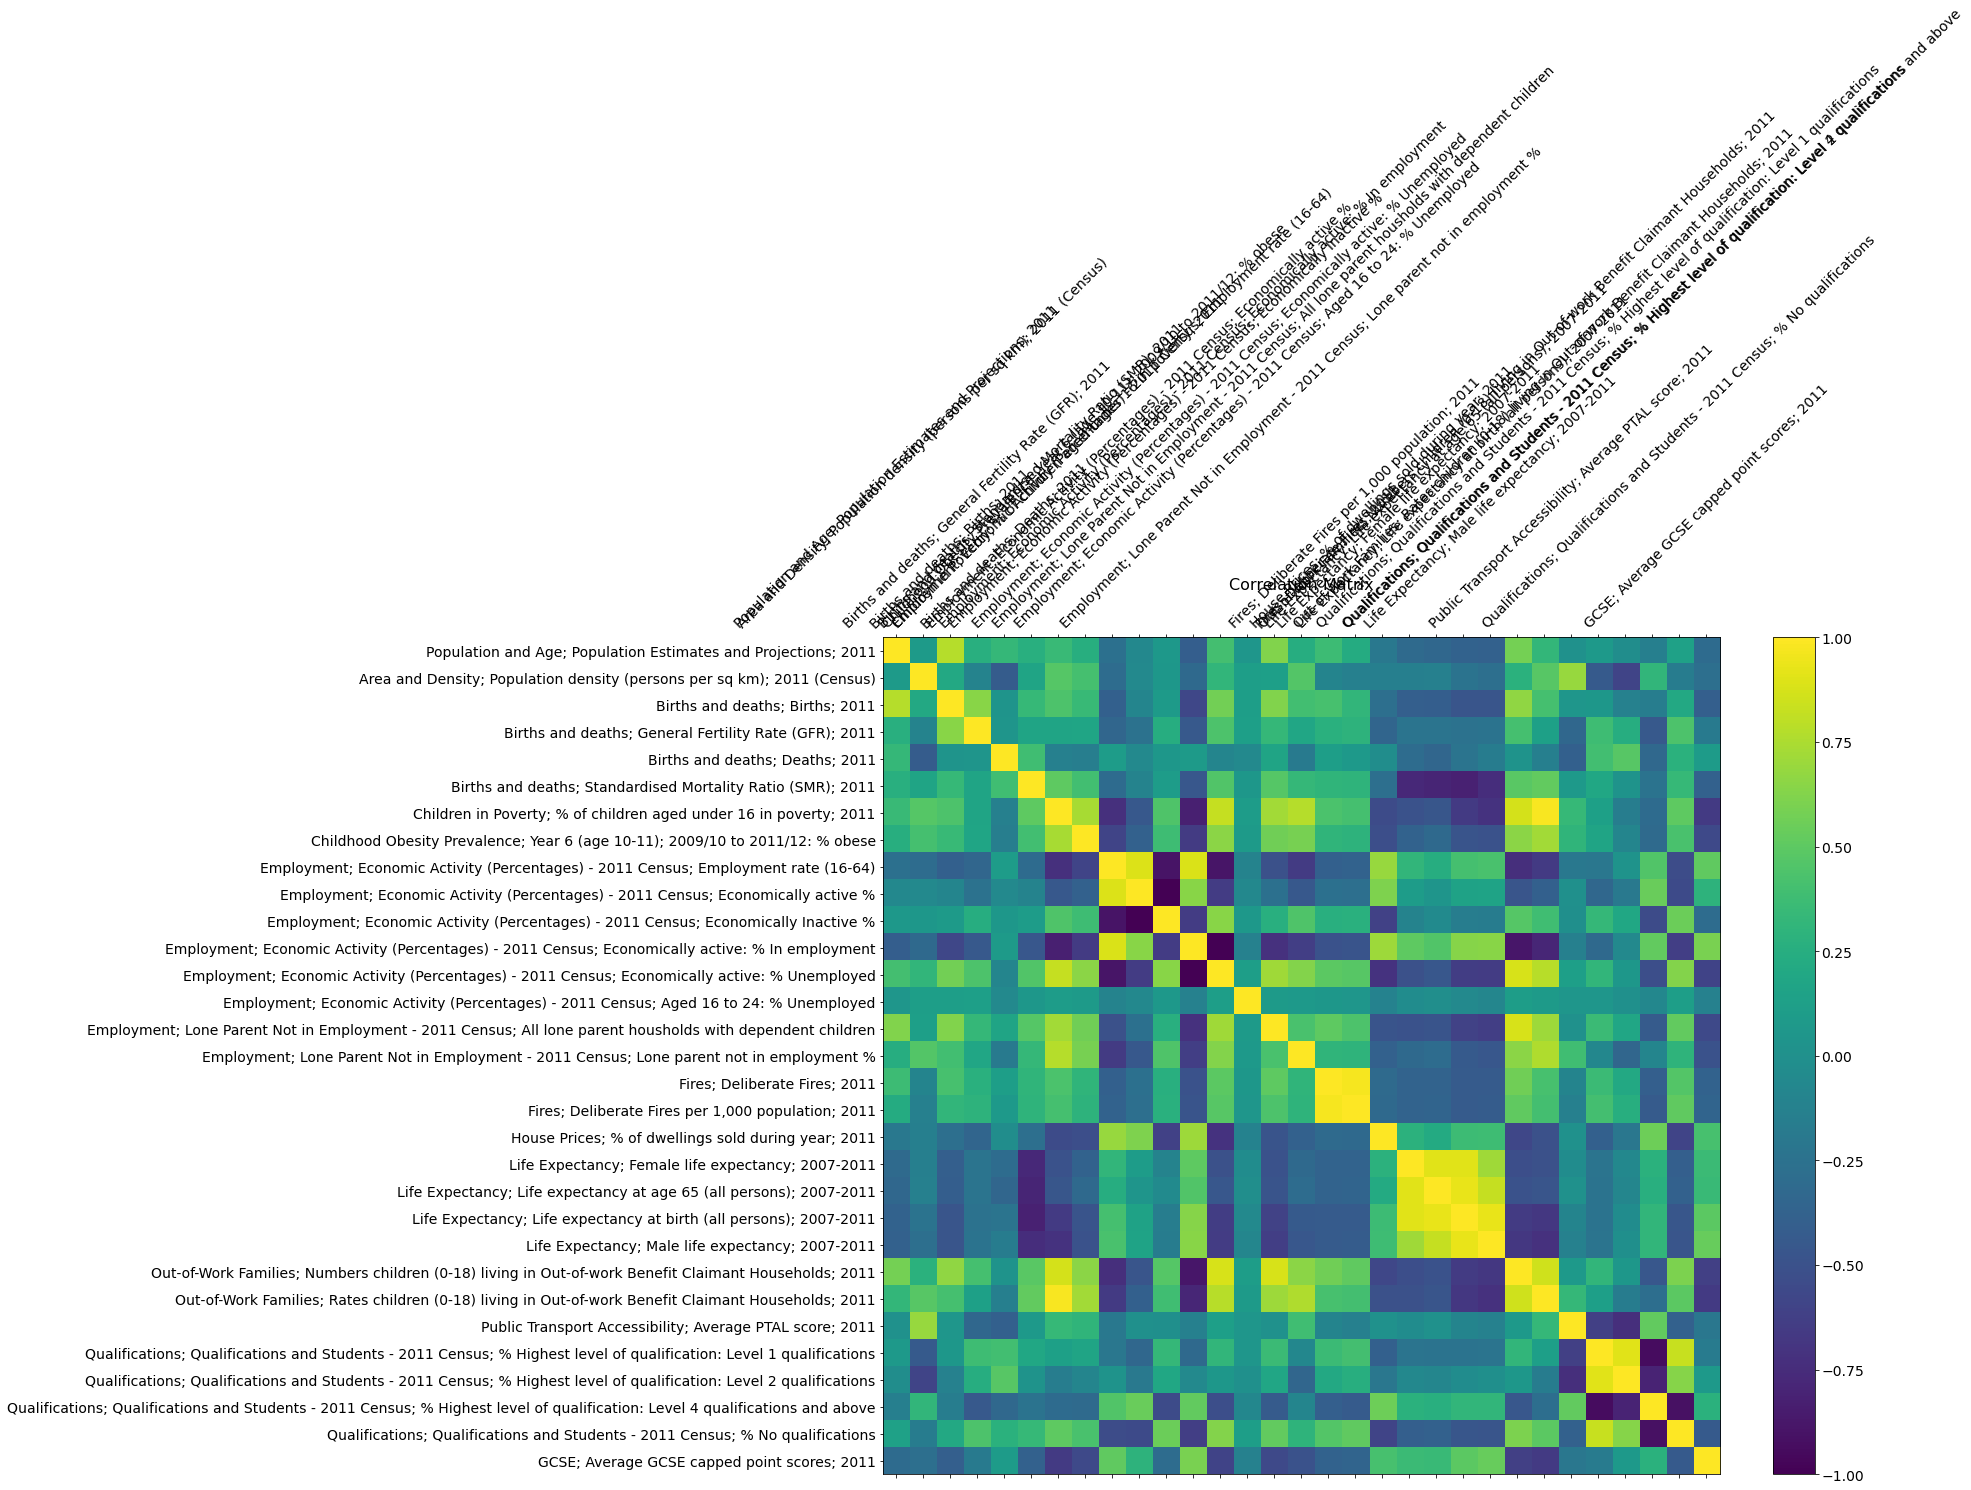

In [15]:
df1 = House_data_2011_using_variables_dropped2
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [16]:
House_data_2011_usable_variables_VIF = drop_column_using_vif_(House_data_2011_using_variables_dropped2)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(House_data_2011_usable_variables_VIF.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % In employment
Dropping: Employment; Economic Activity (Percentages) - 2011 Census; Economically active %
Dropping: Life Expectancy; Life expectancy at birth (all persons); 2007-2011
Dropping: Employment; Economic Activity (Percentages) - 2011 Census; Employment rate (16-64)
Dropping: Out-of-Work Families; Rates children (0-18) living in Out-of-work Benefit Claimant Households; 2011
Dropping: Fires; Deliberate Fires; 2011
Dropping: Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 4 qualifications and above
Dropping: Out-of-Work Families; Numbers children (0-18) living in Out-of-work Benefit Claimant Households; 2011
Dropping: Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 1 qualifications
Dropping: Life Expectancy; Life expectancy at age 65 (all persons); 2007-2011
Dropping: Births and deaths; Bi

In [20]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [23]:
House_data_2011_usable_variables_VIF

,Population and Age; Population Estimates and Projections; 2011,Area and Density; Population density (persons per sq km); 2011 (Census),Births and deaths; General Fertility Rate (GFR); 2011,Births and deaths; Deaths; 2011,Births and deaths; Standardised Mortality Ratio (SMR); 2011,Childhood Obesity Prevalence; Year 6 (age 10-11); 2009/10 to 2011/12: % obese,Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %,Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed,Employment; Lone Parent Not in Employment - 2011 Census; All lone parent housholds with dependent children,Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %,"Fires; Deliberate Fires per 1,000 population; 2011",House Prices; % of dwellings sold during year; 2011,Life Expectancy; Female life expectancy; 2007-2011,Life Expectancy; Male life expectancy; 2007-2011,Public Transport Accessibility; Average PTAL score; 2011,Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 2 qualifications,GCSE; Average GCSE capped point scores; 2011
0,7400,2312.500000,21.785714,33,60.051672,25.515000,21.2,4.090268,91,24.175824,0.100000,4.204993,85.262907,82.252816,7.677303,6.6,363.090909
1,12900,9884.615385,103.692308,38,100.944550,21.467391,31.8,10.553506,499,55.310621,0.955882,2.363714,83.068375,81.024825,5.850451,11.5,335.359259
2,10450,7464.285714,103.720930,71,119.276144,25.853659,32.5,10.365854,623,60.995185,0.682927,1.656920,80.568845,75.957605,3.258821,15.7,333.111570
3,11650,8923.076923,67.384615,79,121.199986,24.874372,32.8,9.045780,662,51.510574,0.720000,4.010082,79.795830,77.462207,2.852044,15.3,327.013855
4,10100,2970.588235,76.666667,87,91.639569,25.816993,33.2,9.881423,563,55.239787,1.836735,1.806037,81.357339,79.273343,2.260996,14.9,339.782308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,8150,20375.000000,33.333333,53,79.047611,23.655914,24.5,3.614458,168,48.214286,0.209424,1.929196,84.000219,82.869666,6.105372,7.6,344.943243
621,10000,14285.714290,39.016393,59,85.691809,22.085890,28.4,3.614458,294,54.421769,0.542986,2.849785,84.807735,80.220817,6.746717,8.1,335.250746
622,9400,15666.666670,40.740741,38,72.890293,19.642857,24.8,6.548431,164,50.000000,0.213904,3.061973,87.184063,81.990857,6.257143,7.1,343.413333
623,12750,18214.285710,69.000000,92,133.361876,27.973568,36.0,11.100386,645,60.930233,0.512821,1.902863,81.312281,74.656310,4.738496,9.6,342.198601


In [ ]:
data = House_data_2011_usable_variables_VIF

First multiple regression model

In [ ]:
model_1_VIF = sm.OLS(endog=House_data_2011_using_variables[['House Prices; Median House Price; 2011']], exog=sm.add_constant(House_data_2011_using_variables_dropped2)).fit()
model_1_VIF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     House Prices; Median House Price; 2011   R-squared:                       0.786
Model:                                                OLS   Adj. R-squared:                  0.776
Method:                                     Least Squares   F-statistic:                     72.93
Date:                                    Mon, 06 Dec 2021   Prob (F-statistic):          1.66e-177
Time:                                            18:37:55   Log-Likelihood:                -7896.6
No. Observations:                                     625   AIC:                         1.586e+04
Df Residuals:                                         594   BIC:                         1.599e+04
Df Model:                                              30                                         
Covariance Type:                                nonrobust                                         
=================================================================================================================================================================================================
                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                          3.836e+10   2.55e+10      1.504      0.133   -1.17e+10    8.85e+10
Population and Age; Population Estimates and Projections; 2011                                                                  -16.8001      3.628     -4.631      0.000     -23.926      -9.675
Area and Density; Population density (persons per sq km); 2011 (Census)                                                           1.5442      1.098      1.406      0.160      -0.613       3.701
Births and deaths; Births; 2011                                                                                                -296.9483    161.357     -1.840      0.066    -613.848      19.951
Births and deaths; General Fertility Rate (GFR); 2011                                                                          -218.8542    379.552     -0.577      0.564    -964.282     526.573
Births and deaths; Deaths; 2011                                                                                                 324.3728    280.034      1.158      0.247    -225.604     874.349
Births and deaths; Standardised Mortality Ratio (SMR); 2011                                                                     244.4929    343.213      0.712      0.477    -429.565     918.551
Children in Poverty; % of children aged under 16 in poverty; 2011                                                              -1.23e+04   2009.783     -6.122      0.000   -1.63e+04   -8357.303
Childhood Obesity Prevalence; Year 6 (age 10-11); 2009/10 to 2011/12: % obese                                                  4647.4263   1006.945      4.615      0.000    2669.821    6625.032
Employment; Economic Activity (Percentages) - 2011 Census; Employment rate (16-64)                                            -2.406e+04   5821.648     -4.134      0.000   -3.55e+04   -1.26e+04
Employment; Economic Activity (Percentages) - 2011 Census; Economically active %                                               1.918e+12   1.28e+12      1.504      0.133   -5.87e+11    4.42e+12
Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %                                             1.918e+12   1.28e+12

In [ ]:
House_data_2011_using_variables_dropped2.columns

Index(['Population and Age; Population Estimates and Projections; 2011',
       'Area and Density; Population density (persons per sq km); 2011 (Census)',
       'Births and deaths; Births; 2011',
       'Births and deaths; General Fertility Rate (GFR); 2011',
       'Births and deaths; Deaths; 2011',
       'Births and deaths; Standardised Mortality Ratio (SMR); 2011',
       'Children in Poverty; % of children aged under 16 in poverty; 2011',
       'Childhood Obesity Prevalence; Year 6 (age 10-11); 2009/10 to 2011/12: % obese',
       'Employment; Economic Activity (Percentages) - 2011 Census; Employment rate (16-64)',
       'Employment; Economic Activity (Percentages) - 2011 Census; Economically active %',
       'Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %',
       'Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % In employment',
       'Employment; Economic Activity (Percentages) - 2011 Census; Economically 

Residual distribution plot

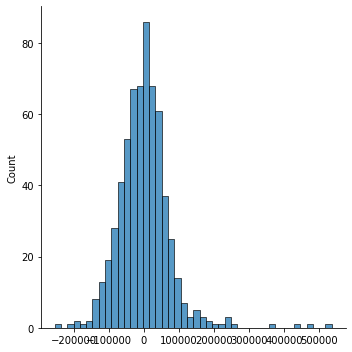

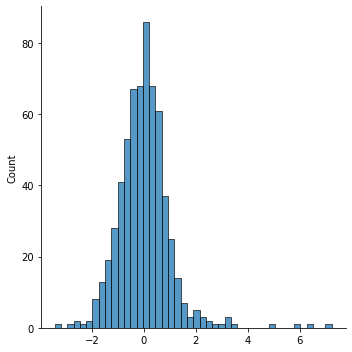

In [ ]:
import seaborn as sns
model_1_residual = model_1_VIF.resid
model_1_standard_residual = model_1_residual/(np.std(model_1_residual))
sns.displot(model_1_residual)
sns.displot(model_1_standard_residual)

Residual plot

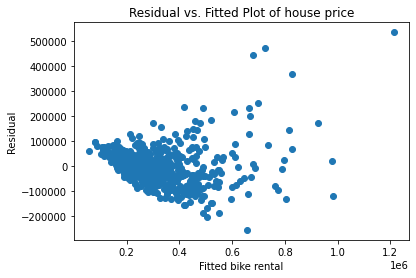

In [ ]:
# plot 
plt.scatter(model_1_VIF.fittedvalues, model_1_VIF.resid)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of house price')
plt.show()

Because it indicates that there are
strong multicollinearity problems or that the design matrix is singular. There are still some columns need to be dropped.
So, drop them using correlation matrix.

In [ ]:
House_data_2011_using_variables_dropped3 = House_data_2011_using_variables_dropped2.drop([
    'Employment; Economic Activity (Percentages) - 2011 Census; Employment rate (16-64)',
    'Fires; Deliberate Fires per 1,000 population; 2011',
    'Life Expectancy; Life expectancy at age 65 (all persons); 2007-2011',
    'Life Expectancy; Life expectancy at birth (all persons); 2007-2011',
    'Life Expectancy; Male life expectancy; 2007-2011',
    'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 2 qualifications',
    'Out-of-Work Families; Rates children (0-18) living in Out-of-work Benefit Claimant Households; 2011',
    'Childhood Obesity Prevalence; Year 6 (age 10-11); 2009/10 to 2011/12: % obese',

####
    'Births and deaths; Births; 2011',
    'Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % Unemployed',
    'Employment; Lone Parent Not in Employment - 2011 Census; All lone parent housholds with dependent children',
   # 'Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %',
    'Out-of-Work Families; Numbers children (0-18) living in Out-of-work Benefit Claimant Households; 2011',
    'Qualifications; Qualifications and Students - 2011 Census; % No qualifications',
    'Children in Poverty; % of children aged under 16 in poverty; 2011',
   # 'Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % In employment',
    'House Prices; % of dwellings sold during year; 2011',
   # 'Public Transport Accessibility; Average PTAL score; 2011',
   # 'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 4 qualifications and above',
   # 'Fires; Deliberate Fires; 2011',
   # 'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 1 qualifications',
    'Births and deaths; Standardised Mortality Ratio (SMR); 2011',
    'Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %'
    ####
    ]
    ,axis=1
)

## 2nd multiple regression model

In [ ]:
model_1_VIF_2 = sm.OLS(endog=House_data_2011_using_variables[['House Prices; Median House Price; 2011']], exog=sm.add_constant(House_data_2011_using_variables_dropped3)).fit()
model_1_VIF_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     House Prices; Median House Price; 2011   R-squared:                       0.717
Model:                                                OLS   Adj. R-squared:                  0.710
Method:                                     Least Squares   F-statistic:                     110.3
Date:                                    Mon, 06 Dec 2021   Prob (F-statistic):          1.28e-156
Time:                                            18:38:45   Log-Likelihood:                -7984.8
No. Observations:                                     625   AIC:                         1.600e+04
Df Residuals:                                         610   BIC:                         1.607e+04
Df Model:                                              14                                         
Covariance Type:                                nonrobust                                         
=================================================================================================================================================================================================
                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                         -1.837e+06   2.44e+05     -7.539      0.000   -2.32e+06   -1.36e+06
Population and Age; Population Estimates and Projections; 2011                                                                   -9.3038      2.015     -4.617      0.000     -13.261      -5.347
Area and Density; Population density (persons per sq km); 2011 (Census)                                                          -0.1909      1.177     -0.162      0.871      -2.502       2.120
Births and deaths; General Fertility Rate (GFR); 2011                                                                           163.7487    239.050      0.685      0.494    -305.712     633.210
Births and deaths; Deaths; 2011                                                                                                   1.0689    207.896      0.005      0.996    -407.210     409.348
Employment; Economic Activity (Percentages) - 2011 Census; Economically active %                                              -1.457e+04   1458.153     -9.990      0.000   -1.74e+04   -1.17e+04
Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % In employment                                2.373e+04   2803.903      8.465      0.000    1.82e+04    2.92e+04
Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed                                         -206.2557    171.882     -1.200      0.231    -543.808     131.296
Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %                                       2877.9251    613.215      4.693      0.000    1673.657    4082.194
Fires; Deliberate Fires; 2011                                                                                                   305.8040    414.237      0.738      0.461    -507.700    1119.308
Life Expectancy; Female life expectancy; 2007-2011                                                                             1.008e+04   2159.138      4.670      0.000    5842.205    1.43e+04
Public Transport Accessibility; Average PTAL score; 2011                                                                       2.022e+04   4498.198

In [ ]:
House_data_2011_using_variables_dropped3.columns

Index(['Population and Age; Population Estimates and Projections; 2011',
       'Area and Density; Population density (persons per sq km); 2011 (Census)',
       'Births and deaths; General Fertility Rate (GFR); 2011',
       'Births and deaths; Deaths; 2011',
       'Employment; Economic Activity (Percentages) - 2011 Census; Economically active %',
       'Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % In employment',
       'Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed',
       'Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %',
       'Fires; Deliberate Fires; 2011',
       'Life Expectancy; Female life expectancy; 2007-2011',
       'Public Transport Accessibility; Average PTAL score; 2011',
       'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 1 qualifications',
       'Qualifications; Qualifications and Students 

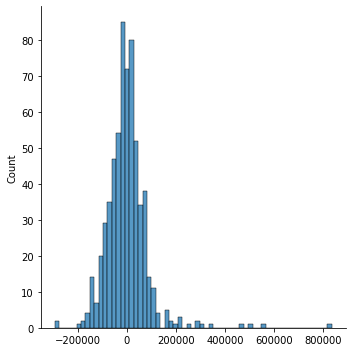

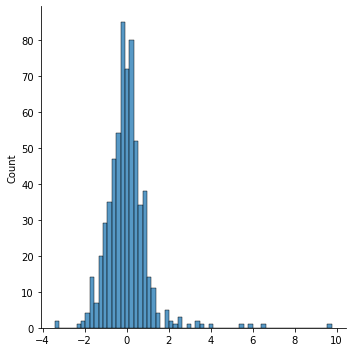

In [ ]:
model_2_residual = model_1_VIF_2.resid
model_2_standard_residual = model_2_residual/(np.std(model_2_residual))
sns.displot(model_2_residual)
sns.displot(model_2_standard_residual)

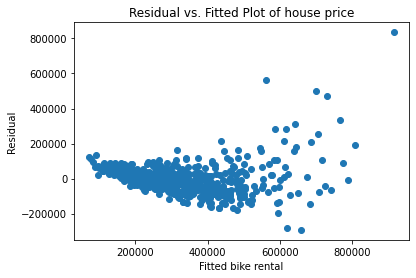

In [ ]:
# plot 
plt.scatter(model_1_VIF_2.fittedvalues, model_1_VIF_2.resid)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of house price')
plt.show()

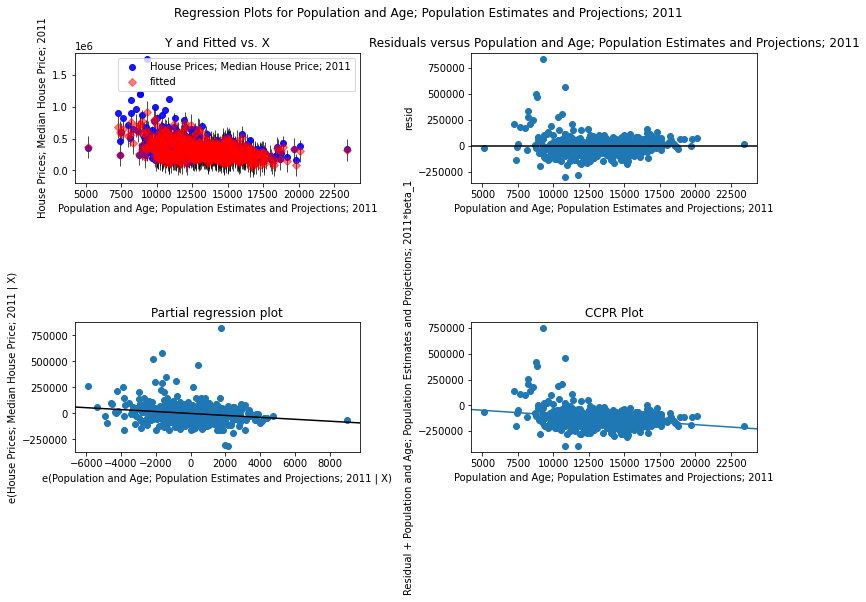

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_1_VIF_2, 'Population and Age; Population Estimates and Projections; 2011', fig=fig)

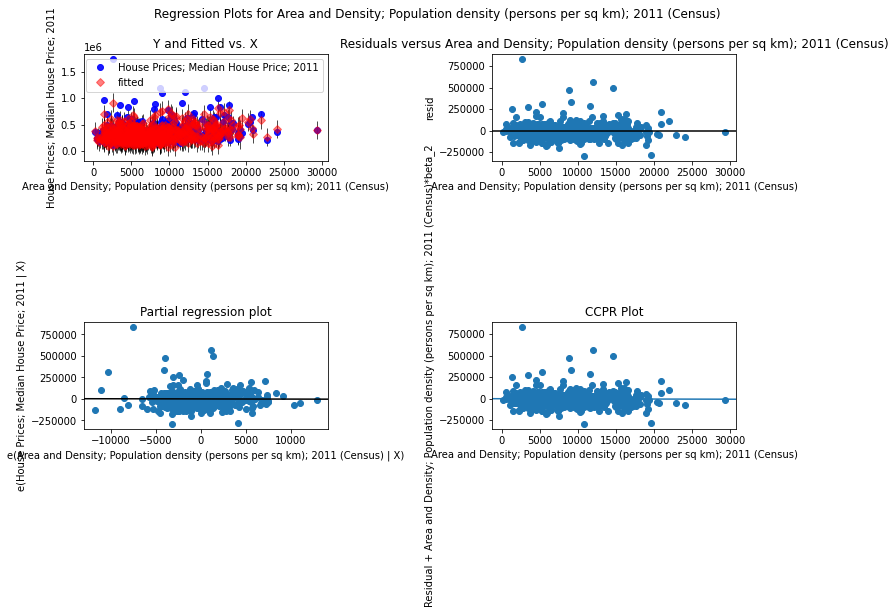

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_1_VIF_2, 'Area and Density; Population density (persons per sq km); 2011 (Census)', fig=fig)

In [ ]:
df2 = House_data_2011_using_variables_dropped3
plt.rcParams["axes.grid"] = False
f2 = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f2.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
House_data_2011_using_variables_dropped3.columns

Index(['Population and Age; Population Estimates and Projections; 2011',
       'Area and Density; Population density (persons per sq km); 2011 (Census)',
       'Births and deaths; General Fertility Rate (GFR); 2011',
       'Births and deaths; Deaths; 2011',
       'Employment; Economic Activity (Percentages) - 2011 Census; Economically active %',
       'Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % In employment',
       'Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed',
       'Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %',
       'Fires; Deliberate Fires; 2011',
       'Life Expectancy; Female life expectancy; 2007-2011',
       'Public Transport Accessibility; Average PTAL score; 2011',
       'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 1 qualifications',
       'Qualifications; Qualifications and Students 

# Polynomial regression model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = House_data_2011_using_variables_dropped3
y = House_data_2011_using_variables[['House Prices; Median House Price; 2011']]

2 degree

In [ ]:
poly_reg_d2 =  PolynomialFeatures(degree = 2)
X_poly_d2 = poly_reg_d2.fit_transform(X)

In [ ]:
model_2_poly_d2 = sm.OLS(endog=House_data_2011_using_variables[['House Prices; Median House Price; 2011']], exog=sm.add_constant(X_poly_d2)).fit()
model_2_poly_d2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     House Prices; Median House Price; 2011   R-squared:                       0.884
Model:                                                OLS   Adj. R-squared:                  0.856
Method:                                     Least Squares   F-statistic:                     32.26
Date:                                    Mon, 06 Dec 2021   Prob (F-statistic):          8.91e-176
Time:                                            18:42:04   Log-Likelihood:                -7706.6
No. Observations:                                     625   AIC:                         1.565e+04
Df Residuals:                                         505   BIC:                         1.619e+04
Df Model:                                             119                                         
Covariance Type:                                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.544e+06   1.09e+07      0.234      0.815   -1.88e+07    2.39e+07
x1           138.2370    129.897      1.064      0.288    -116.967     393.441
x2           122.4241     73.456      1.667      0.096     -21.894     266.742
x3          1.341e+04   1.53e+04      0.874      0.383   -1.67e+04    4.36e+04
x4          6310.6039   1.34e+04      0.471      0.638      -2e+04    3.26e+04
x5          1.865e+04   8.65e+04      0.216      0.829   -1.51e+05    1.89e+05
x6         -3.126e+05   1.89e+05     -1.654      0.099   -6.84e+05    5.86e+04
x7         -8.597e+04   7.77e+04     -1.106      0.269   -2.39e+05    6.67e+04
x8          1.146e+04   4.05e+04      0.283      0.777   -6.81e+04    9.11e+04
x9          1.571e+04   2.63e+04      0.597      0.551    -3.6e+04    6.74e+04
x10         1.414e+05   1.42e+05      0.999      0.318   -1.37e+05    4.19e+05
x11         -2.95e+05   2.86e+05     -1.030      0.304   -8.58e+05    2.68e+05
x12         4.992e+05   2.39e+05      2.088      0.037    2.95e+04    9.69e+05
x13         1.308e+05   7.72e+04      1.694      0.091   -2.09e+04    2.82e+05
x14        -1.101e+04   1.48e+04     -0.746      0.456      -4e+04     1.8e+04
x15            0.0013      0.001      2.176      0.030       0.000       0.003
x16           -0.0012      0.001     -2.026      0.043      -0.002   -3.72e-05
x17            0.0452      0.109      0.415      0.678      -0.169       0.259
x18            0.0798      0.103      0.775      0.439      -0.122       0.282
x19            2.6568      0.807      3.294      0.001       1.072       4.241
x20           -3.2822      1.548     -2.120      0.034      -6.324      -0.241
x21           -0.7792      0.707     -1.102      0.271      -2.169       0.610
x22           -0.8666      0.307     -2.822      0.005      -1.470      -0.263
x23            0.0261      0.237      0.110      0.912      -0.439       0.491
x24           -0.6687      0.976     -0.685      0.494      -2.586       1.249
x25            0.3565      2.369      0.150      0.880      -4.298       5.011
x26           -1.9048      2.098     -0.908      0.364      -6.026       2.216
x27           -0.9918      0.667     -1.487      0.138      -2.302       0.319
x28            0.2557      0.127      2.011      0.045       0.006       0.505
x29           -0.0002      0.000     -0.948      0.344      -0.001       0.000
x30           -0.0885      0.067     -1.315      0.189      -0.221       0.044
x31            0.1223      0.075      1.627      0.104      -0.025       0.270
x32            1.4479      0.418      3.460      0.001       0.626       2.270
x33           -3.63

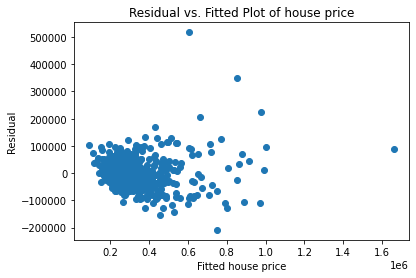

In [ ]:
# plot 
plt.scatter(model_2_poly_d2.fittedvalues, model_2_poly_d2.resid)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of house price')
plt.show()

# 3 degree polynomial regression model - reach the best performance

In [ ]:
poly_reg_d3 =  PolynomialFeatures(degree = 3)
X_poly_d3 = poly_reg_d3.fit_transform(X)

In [ ]:
model_2_poly_d3 = sm.OLS(endog=House_data_2011_using_variables[['House Prices; Median House Price; 2011']], exog=sm.add_constant(X_poly_d3)).fit()
model_2_poly_d3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     House Prices; Median House Price; 2011   R-squared:                       1.000
Model:                                                OLS   Adj. R-squared:                  1.000
Method:                                     Least Squares   F-statistic:                     4171.
Date:                                    Mon, 06 Dec 2021   Prob (F-statistic):           3.43e-84
Time:                                            18:42:28   Log-Likelihood:                -5024.8
No. Observations:                                     625   AIC:                         1.120e+04
Df Residuals:                                          52   BIC:                         1.374e+04
Df Model:                                             572                                         
Covariance Type:                                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5235.9403    248.206     21.095      0.000    4737.879    5734.002
x1          1.702e+04    966.274     17.616      0.000    1.51e+04     1.9e+04
x2         -1.419e+04   1142.318    -12.423      0.000   -1.65e+04   -1.19e+04
x3          -581.0363     78.362     -7.415      0.000    -738.281    -423.791
x4          2174.5222    130.789     16.626      0.000    1912.075    2436.969
x5          2150.0831    108.480     19.820      0.000    1932.401    2367.765
x6          2241.0707    127.253     17.611      0.000    1985.718    2496.423
x7           259.1978     23.520     11.020      0.000     212.001     306.394
x8          -517.9676     52.905     -9.790      0.000    -624.130    -411.805
x9          -645.4887     35.578    -18.143      0.000    -716.881    -574.096
x10         1820.1708    101.693     17.899      0.000    1616.109    2024.232
x11          151.5453     25.347      5.979      0.000     100.684     202.407
x12          917.9851     55.088     16.664      0.000     807.442    1028.528
x13          550.1701     44.894     12.255      0.000     460.084     640.256
x14         6357.1056    408.557     15.560      0.000    5537.275    7176.936
x15           -0.2323      0.032     -7.367      0.000      -0.296      -0.169
x16           -0.3028      0.037     -8.248      0.000      -0.376      -0.229
x17         -150.6648      6.646    -22.669      0.000    -164.002    -137.328
x18           26.5262      6.296      4.213      0.000      13.893      39.159
x19         -460.6947     33.479    -13.761      0.000    -527.874    -393.515
x20          944.4268     68.086     13.871      0.000     807.803    1081.051
x21           50.5944     27.619      1.832      0.073      -4.827     106.016
x22          235.0624      8.595     27.349      0.000     217.816     252.309
x23           -6.2993     14.479     -0.435      0.665     -35.353      22.754
x24         -802.3598     63.821    -12.572      0.000    -930.426    -674.294
x25         -439.9929     79.620     -5.526      0.000    -599.763    -280.223
x26          510.8597     69.789      7.320      0.000     370.817     650.903
x27           58.4582     21.801      2.682      0.010      14.712     102.204
x28          -58.9440      6.072     -9.708      0.000     -71.128     -46.761
x29            0.0456      0.010      4.650      0.000       0.026       0.065
x30           20.8783      3.433      6.082      0.000      13.990      27.767
x31           45.8883      3.563     12.880      0.000      38.739      53.037
x32           13.6993     22.004      0.623      0.536     -30.455      57.854
x33         -154.89

In [ ]:
y_poly_pred = model_2_poly_d3.predict(X_poly_d3)

## Almost perfect r-squared value

750.4529039450158
0.9999782037894082


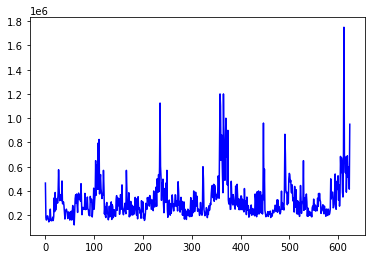

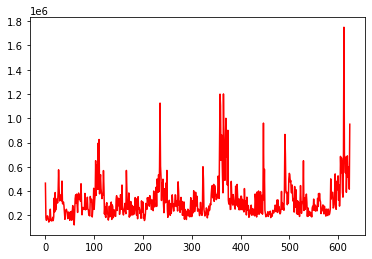

In [ ]:
print(np.sqrt(mean_squared_error(y,y_poly_pred)))
print(r2_score(y,y_poly_pred))

plt.plot(y, color = 'b')
plt.show()
# sort the values of x before line plot
#sort_axis = operator.itemgetter(0)
#sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
#x, y_poly_pred = zip(*sorted_zip)
plt.plot(y_poly_pred, color='r')
plt.show()

## Fitting vs real plot

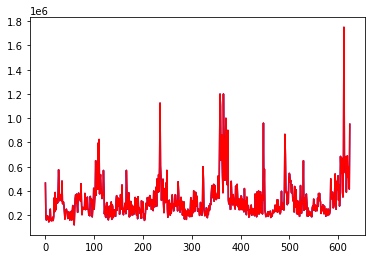

In [ ]:
plt.plot(y, color = 'b')
plt.plot(y_poly_pred, color='r')
plt.show()

## Residual analysis

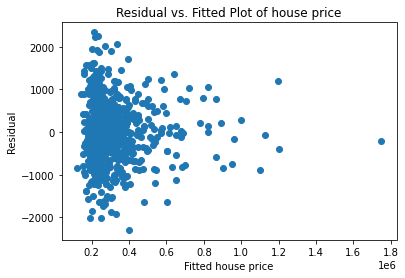

In [ ]:
# plot 
plt.scatter(model_2_poly_d3.fittedvalues, model_2_poly_d3.resid)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of house price')
plt.show()

## Residual distribution plot

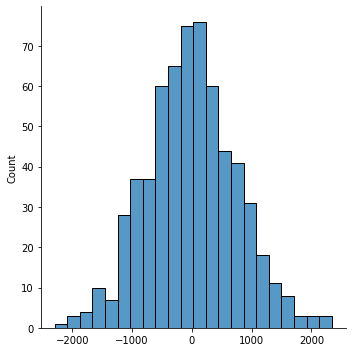

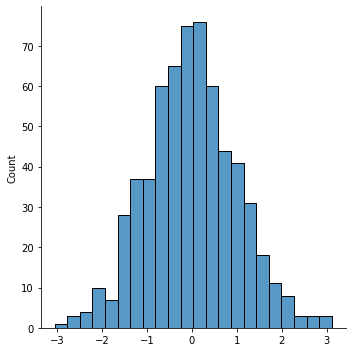

In [ ]:
model_2_poly_d3_residual = model_2_poly_d3.resid
model_2_poly_d3_standard_residual = model_2_poly_d3_residual/(np.std(model_2_poly_d3_residual))
sns.displot(model_2_poly_d3_residual)
sns.displot(model_2_poly_d3_standard_residual)

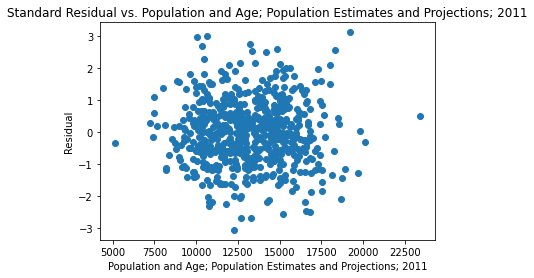

In [ ]:
# residual plot 
plt.scatter(House_data_2011_using_variables_dropped3['Population and Age; Population Estimates and Projections; 2011'], model_2_poly_d3_standard_residual)
# adding title and labels
plt.xlabel('Population and Age; Population Estimates and Projections; 2011')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Population and Age; Population Estimates and Projections; 2011')
plt.show()

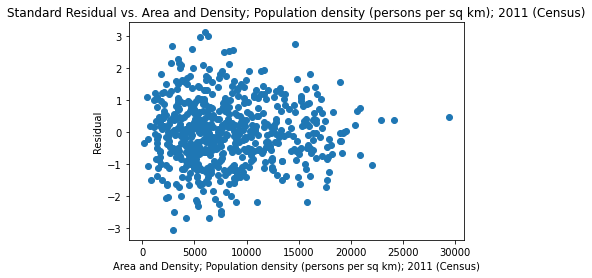

In [ ]:
# residual plot 
plt.scatter(House_data_2011_using_variables_dropped3['Area and Density; Population density (persons per sq km); 2011 (Census)'], model_2_poly_d3_standard_residual)
# adding title and labels
plt.xlabel('Area and Density; Population density (persons per sq km); 2011 (Census)')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Area and Density; Population density (persons per sq km); 2011 (Census)')
plt.show()

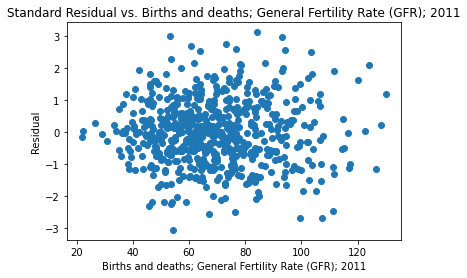

In [ ]:
# residual plot 
plt.scatter(House_data_2011_using_variables_dropped3['Births and deaths; General Fertility Rate (GFR); 2011'], model_2_poly_d3_standard_residual)
# adding title and labels
plt.xlabel('Births and deaths; General Fertility Rate (GFR); 2011')
plt.ylabel('Standard Residual')
plt.title('Standard Residual vs. Births and deaths; General Fertility Rate (GFR); 2011')
plt.show()

## Neural network model for this dataset

In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
X_train_pd = X[125:]
y_train_pd = y[125:]
X_test_pd = X[:124]
y_test_pd = y[:124]

In [ ]:
min_max_scaler = MinMaxScaler()  
min_max_scaler.fit(X_train_pd)
X_train = min_max_scaler.transform(X_train_pd)  
min_max_scaler.fit(y_train_pd) 
y_train = min_max_scaler.transform(y_train_pd)  
min_max_scaler.fit(X_test_pd)  
X_test = min_max_scaler.transform(X_test_pd)  
min_max_scaler.fit(y_test_pd)  
y_test = min_max_scaler.transform(y_test_pd)  

Epoch 1/200
8/8 [==============================] - 1s 3ms/step - loss: 0.0298
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 11/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 12/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 13/200
8/8 [==============================] - 0s 3ms/st

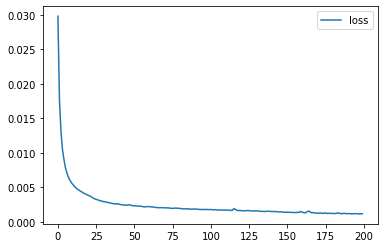

In [ ]:
model_1 = Sequential()

model_1.add(Dense(25, input_dim=14,activation='relu'))
model_1.add(Dense(25, activation='relu'))


model_1.add(Dense(1,activation='linear'))

model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(X_train, y_train, batch_size = 64, epochs=200).history
pd.DataFrame(history).plot()
plt.show()

MSE: 0.06
RMSE: 0.24


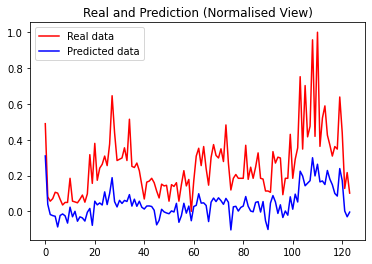

MSE: 28777265781.17
RMSE: 169638.63


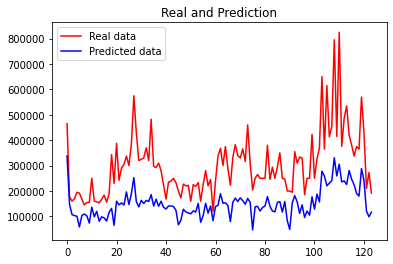

In [ ]:
y_pred_1 = model_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred_1)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_1, color = 'blue', label = 'Predicted data')
plt.title('Real and Prediction (Normalised View)')
plt.legend()
plt.show()



min_max_scaler.fit(y_test_pd)
y_pred_1_inv = min_max_scaler.inverse_transform(y_pred_1)  
mse = mean_squared_error(y_test_pd, y_pred_1_inv)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

plt.plot(y_test_pd, color = 'red', label = 'Real data')
plt.plot(y_pred_1_inv, color = 'blue', label = 'Predicted data')
plt.title('Real and Prediction')
plt.legend()
plt.show()

In [ ]:
# R-squared
unexplained_error1 = tf.reduce_sum(tf.square(tf.subtract(y_test_pd, y_pred_1_inv)))
total_error1 = tf.reduce_sum(tf.square(tf.subtract(y_test_pd, tf.reduce_mean(y_test))))
R_squared1 = tf.subtract(1, tf.divide(unexplained_error1, total_error1))
R_squared1

<tf.Tensor: shape=(), dtype=float64, numpy=0.7266678596723358>

R-squared value is not very different from multiple regression model. In this case, with small number of rows of data, neural network is not very suitable, and waste more time. 

In [ ]:
model_1_resid = y_test - y_pred_1

In [ ]:
model_1_resid.size

124

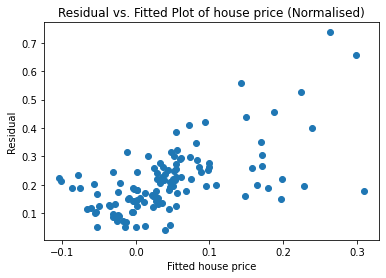

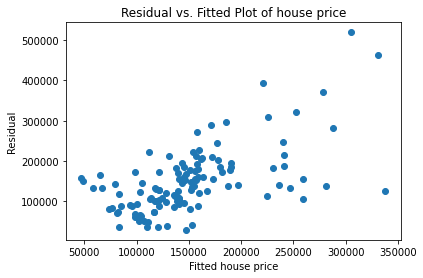

In [ ]:
# residual plot 
plt.scatter(y_pred_1, y_test - y_pred_1)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of house price (Normalised)')
plt.show()


plt.scatter(y_pred_1_inv, y_test_pd - y_pred_1_inv)
# adding title and labels
plt.xlabel('Fitted house price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of house price')
plt.show()

## Beacuse the data set is divided into 20% test set and 80% training set, so it is not able to draw 'Residual vs. predictor plot'


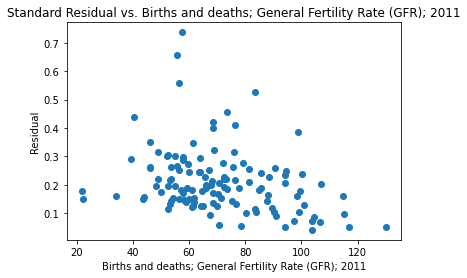

In [ ]:
# residual plot 
plt.scatter(X_test_pd['Births and deaths; General Fertility Rate (GFR); 2011'], model_1_resid)
# adding title and labels
plt.xlabel('Births and deaths; General Fertility Rate (GFR); 2011')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Births and deaths; General Fertility Rate (GFR); 2011')
plt.show()

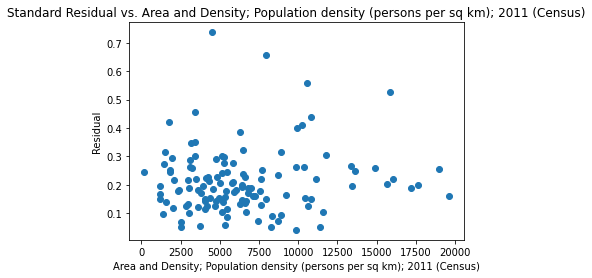

In [ ]:
# residual plot 
plt.scatter(X_test_pd['Area and Density; Population density (persons per sq km); 2011 (Census)'], model_1_resid)
# adding title and labels
plt.xlabel('Area and Density; Population density (persons per sq km); 2011 (Census)')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Area and Density; Population density (persons per sq km); 2011 (Census)')
plt.show()

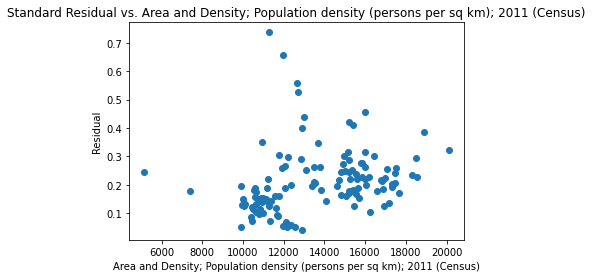

In [ ]:
# residual plot 
plt.scatter(X_test_pd['Population and Age; Population Estimates and Projections; 2011'], model_1_resid)
# adding title and labels
plt.xlabel('Area and Density; Population density (persons per sq km); 2011 (Census)')
plt.ylabel('Residual')
plt.title('Standard Residual vs. Area and Density; Population density (persons per sq km); 2011 (Census)')
plt.show()